In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
fifa = pd.read_csv("FIFAplayers.csv")
fifa.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fifa.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [4]:
# dropping columns from the raw dataset as discussed
fifa = fifa.drop(['Special', 'Name','Photo','Flag','Club Logo','GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes','CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB','RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],axis=1)
fifa.head()

,Unnamed: 0,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,1,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,2,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,3,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,4,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


In [5]:
# converting values and wages into float numbers
def convert_valuewage(v):
    if v[len(v)-1] == "M":
        v = v.strip("€M")
        v = float(v)
        v = v*1000000
    else:
        v = v.strip("€K")
        v = float(v)
        v = v*1000
    return v
fifa["Value"] = fifa["Value"].map(convert_valuewage)
fifa["Wage"] = fifa["Wage"].map(convert_valuewage)
fifa.head()

,Unnamed: 0,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,1,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,2,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,3,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,4,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,58,29,...,55,25,11,61,44,10,83,70,11,GK


In [6]:
# keeping the original player postion
def base_pos(p):
    p = p.split(" ")
    p = p[0]
    return p
fifa["Preferred Positions"] = fifa["Preferred Positions"].map(base_pos)
fifa.head()

,Unnamed: 0,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89,63,...,83,94,23,91,92,31,80,85,88,ST
1,1,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,2,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,3,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,4,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,58,29,...,55,25,11,61,44,10,83,70,11,GK


In [7]:
# filtering out the goalkeepers
fifa = fifa[fifa["Preferred Positions"] != "GK"]
fifa.shape

(15952, 38)

In [8]:
# removing row containing null values for wages and values
fifa = fifa[(fifa["Wage"]>0) & (fifa["Value"]>0)]

In [9]:
columns = list(fifa.columns)
columns.index("Acceleration")

8

In [10]:
# keeping the base rating for a player
def base_rating(r):
    r = str(r)
    r = r[0:2]
    r = int(r)
    return r
for i in range(columns.index("Acceleration"),columns.index("Volleys")+1):
    fifa[columns[i]] = fifa[columns[i]].map(base_rating)


In [11]:
fifa.head()

,Unnamed: 0,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89,63,...,83,94,23,91,92,31,80,85,88,ST
1,1,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,2,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,3,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88,78,...,83,87,38,77,89,45,80,84,88,ST
5,5,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,79,80,...,83,88,19,83,79,42,84,78,87,ST


In [12]:
continent = pd.read_csv("Countries-Continents.csv")
continent.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [13]:
# getting play_country
fifa = pd.merge(fifa,continent,left_on="Nationality",right_on="Country")
fifa.drop("Country",axis=1,inplace=True)
fifa.head()

,Unnamed: 0,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Continent
0,0,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89,63,...,94,23,91,92,31,80,85,88,ST,Europe
1,1,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92,48,...,85,26,87,73,28,59,90,85,RW,South America
2,2,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94,56,...,80,33,90,78,24,53,80,83,LW,South America
3,3,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88,78,...,87,38,77,89,45,80,84,88,ST,South America
4,5,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,79,80,...,88,19,83,79,42,84,78,87,ST,Europe


In [14]:
fifa.drop("Nationality",axis=1,inplace=True)

In [15]:
club_info = pd.read_csv("Clubs Info Database.csv",encoding = 'latin-1')
club_info.head()

,Team,Club_Country,Club_Continent,Club_League
0,Real Madrid CF,Spain,Europe,La Liga
1,FC Barcelona,Spain,Europe,La Liga
2,Paris Saint-Germain,France,Europe,Ligue 1
3,FC Bayern Munich,Germany,Europe,Bundesliga
4,Chelsea,England,Europe,Premier League


In [16]:
# merging club info with the dataset
fifa = pd.merge(fifa,club_info,left_on="Club",right_on="Team")

In [17]:
fifa.head()

,Unnamed: 0,Age,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,Agility,...,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Continent,Team,Club_Country,Club_Continent,Club_League
0,0,32,94,94,Real Madrid CF,95500000.0,565000.0,89,63,89,...,31,80,85,88,ST,Europe,Real Madrid CF,Spain,Europe,La Liga
1,1,30,93,93,FC Barcelona,105000000.0,565000.0,92,48,90,...,28,59,90,85,RW,South America,FC Barcelona,Spain,Europe,La Liga
2,2,25,92,94,Paris Saint-Germain,123000000.0,280000.0,94,56,96,...,24,53,80,83,LW,South America,Paris Saint-Germain,France,Europe,Ligue 1
3,3,30,92,92,FC Barcelona,97000000.0,510000.0,88,78,86,...,45,80,84,88,ST,South America,FC Barcelona,Spain,Europe,La Liga
4,5,28,91,91,FC Bayern Munich,92000000.0,355000.0,79,80,78,...,42,84,78,87,ST,Europe,FC Bayern Munich,Germany,Europe,Bundesliga


In [18]:
fifa.columns

Index(['Unnamed: 0', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'Preferred Positions', 'Continent', 'Team', 'Club_Country',
       'Club_Continent', 'Club_League'],
      dtype='object')

In [19]:
fifa.drop(['Club','Team','Club_Country','Unnamed: 0'],axis=1,inplace=True)

In [20]:
fifa.head()

,Age,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,Balance,Ball control,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Continent,Club_Continent,Club_League
0,32,94,94,95500000.0,565000.0,89,63,89,63,93,...,91,92,31,80,85,88,ST,Europe,Europe,La Liga
1,30,93,93,105000000.0,565000.0,92,48,90,95,95,...,87,73,28,59,90,85,RW,South America,Europe,La Liga
2,25,92,94,123000000.0,280000.0,94,56,96,82,95,...,90,78,24,53,80,83,LW,South America,Europe,Ligue 1
3,30,92,92,97000000.0,510000.0,88,78,86,60,91,...,77,89,45,80,84,88,ST,South America,Europe,La Liga
4,28,91,91,92000000.0,355000.0,79,80,78,80,89,...,83,79,42,84,78,87,ST,Europe,Europe,Bundesliga


In [21]:
# getting dummies for our categorical variables
fifa = pd.get_dummies(fifa, columns=["Continent",'Club_Continent','Preferred Positions', 'Club_League'])

In [22]:
fifa.shape

(11618, 129)

In [23]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
import math

In [24]:
X = fifa.drop(["Value","Wage"],axis=1)
wage = fifa["Wage"]
value = fifa["Value"]

In [25]:
#creating train-test split
X_train_value, X_test_value, value_train, value_test = train_test_split(X,value,test_size=0.2,random_state=100)

In [26]:
#creating train-test split
X_train_wages, X_test_wages, wages_train, wages_test = train_test_split(X,wage,test_size=0.2,random_state=100)

In [27]:
# running random forest
rf = RFR(n_estimators=350,max_features=60,random_state=100)
rf.fit(X_train_value,value_train)

RandomForestRegressor(max_features=60, n_estimators=350, random_state=100)

In [28]:
value_pred = rf.predict(X_test_value)
math.sqrt(mean_squared_error(value_test,value_pred))

843690.7318506354

In [29]:
feature_importances_rf_value = pd.Series(rf.feature_importances_)
feature_importances_rf_value.index = X_train_value.columns
feature_importances_rf_value

Age                                      1.640459e-02
Overall                                  5.271697e-01
Potential                                2.003528e-01
Acceleration                             2.140678e-03
Aggression                               1.254884e-03
                                             ...     
Club_League_ TFF Second League           2.713172e-08
Club_League_ Tercera Federación          1.839446e-08
Club_League_ USL League Two              5.496747e-09
Club_League_ Ukrainian Premier League    3.186925e-06
Club_League_ Veikkausliiga               1.546724e-08
Length: 127, dtype: float64

<Axes: >

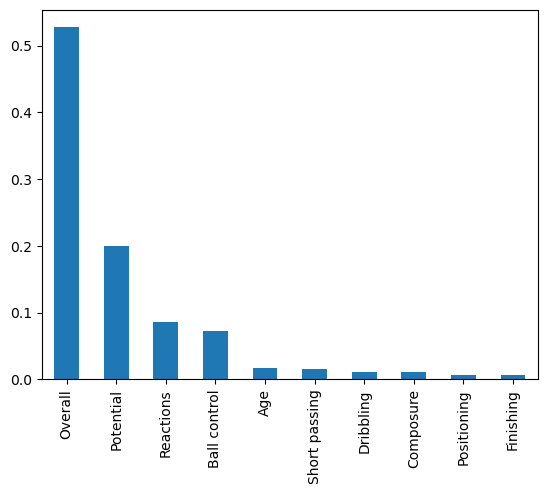

In [30]:
feature_importances_rf_value.sort_values(ascending=False)[:10].plot(kind="bar")

In [31]:
from xgboost import XGBRegressor

In [32]:
# running xgboost
xgb = XGBRegressor(n_estimators=10000,learning_rate=0.1,random_state=100)
xgb.fit(X_train_value,value_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)

In [33]:
value_pred = xgb.predict(X_test_value)
math.sqrt(mean_squared_error(value_test,value_pred))

592265.3109931289

<Axes: >

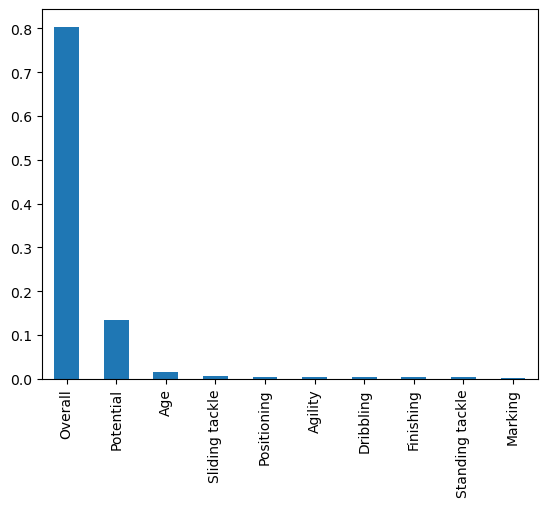

In [34]:
feature_importances_xgb_value = pd.Series(xgb.feature_importances_)
feature_importances_xgb_value.index = X_train_value.columns
feature_importances_xgb_value.sort_values(ascending=False)[:10].plot(kind="bar")

In [35]:
# running random forest for wage
rf = RFR(n_estimators=350,max_features=60,random_state=100)
rf.fit(X_train_wages,wages_train)
wages_pred = rf.predict(X_test_wages)
math.sqrt(mean_squared_error(wages_test,wages_pred))

9954.118294157724

<Axes: >

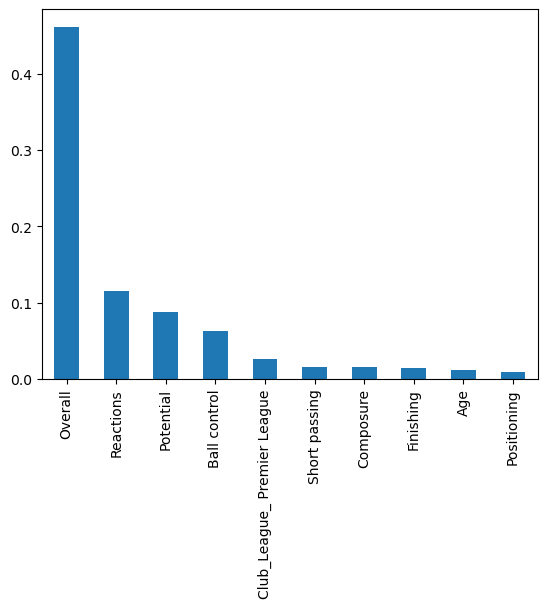

In [36]:
feature_importances_rf_wages = pd.Series(rf.feature_importances_)
feature_importances_rf_wages.index = X_train_wages.columns
feature_importances_rf_wages.sort_values(ascending=False)[:10].plot(kind="bar")

In [37]:
# running xgboost for wage
xgb = XGBRegressor(n_estimators=10000,learning_rate=0.1,eval_metric="logloss",random_state=100)
xgb.fit(X_train_wages,wages_train)
wage_pred = xgb.predict(X_test_wages)
math.sqrt(mean_squared_error(wages_test,wages_pred))

9954.118294157724

<Axes: >

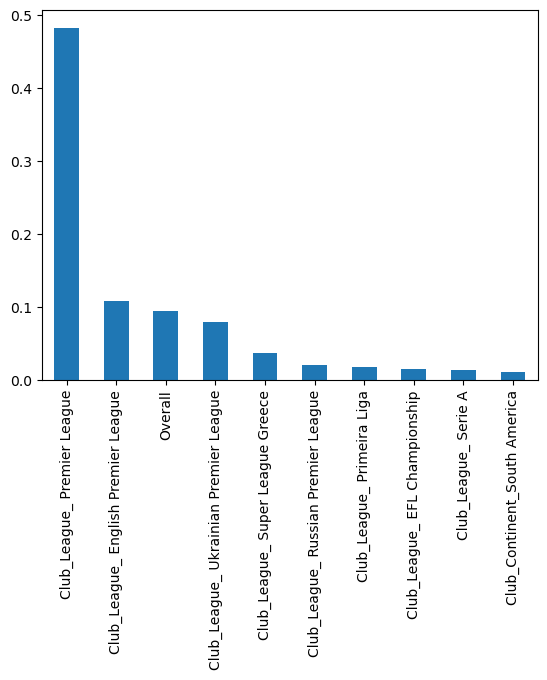

In [38]:
feature_importances_xgb_wages = pd.Series(xgb.feature_importances_)
feature_importances_xgb_wages.index = X_train_wages.columns
feature_importances_xgb_wages.sort_values(ascending=False)[:10].plot(kind="bar")

In [39]:
#Basic Decision Tree Model

In [40]:
#import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold


In [41]:
dtr_model = DecisionTreeRegressor(random_state = 100)
dtr_model.fit(X_train_value, value_train)
#predict on testing set
value_pred = dtr_model.predict(X_test_value)
#calculate and print out mean squared error
mse_dtr = math.sqrt(mean_squared_error(value_test, value_pred))
print(mse_dtr)

1042086.7804570992


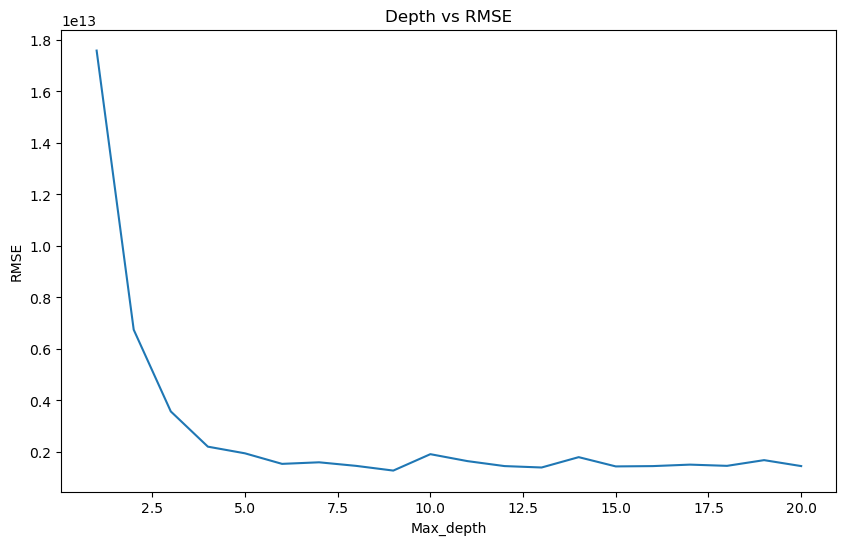

In [42]:
#use cross validation to get max depth and prune decision tree
kfold = KFold(n_splits = 10, shuffle = True)

depth = range(1,21)
mse_values = [] #create empty list to add values for plot
for max_depth in depth:
    cv_model = DecisionTreeRegressor(random_state = 100, max_depth = max_depth)
    scores = cross_val_score(cv_model, X_train_value, value_train, cv = kfold, scoring='neg_mean_squared_error')
    #print('max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean()))
    #print just average scores to make it easier to look at
    mse_values.append(-scores.mean())
    #print('max_depth={}' 'avg_score{}'.format(max_depth, scores.mean()))

#plot Max-Depth vs Avg Score
plt.figure(figsize = (10, 6))
plt.plot(depth, mse_values)
plt.title('Depth vs RMSE')
plt.xlabel('Max_depth')
plt.ylabel('RMSE')
plt.show()

In [43]:
#refit tree with max depth 7
dtr_model = DecisionTreeRegressor(random_state = 100, max_depth = 7)
dtr_model.fit(X_train_value, value_train)
#predict on testing set
value_pred = dtr_model.predict(X_test_value)
#calculate and print out mean squared error
rmse_dtr = math.sqrt(mean_squared_error(value_test, value_pred))
print(rmse_dtr)

1116018.5978068274


In [44]:
#repeat same process for wages
dtr_model_wages = DecisionTreeRegressor(random_state = 100)
dtr_model_wages.fit(X_train_wages, wages_train)
#predict on testing set
wage_pred = dtr_model_wages.predict(X_test_wages)
#calculate and print out mean squared error
rmse_dtr_wage = math.sqrt(mean_squared_error(wages_test, wage_pred))
print(rmse_dtr_wage)




12811.220340361582


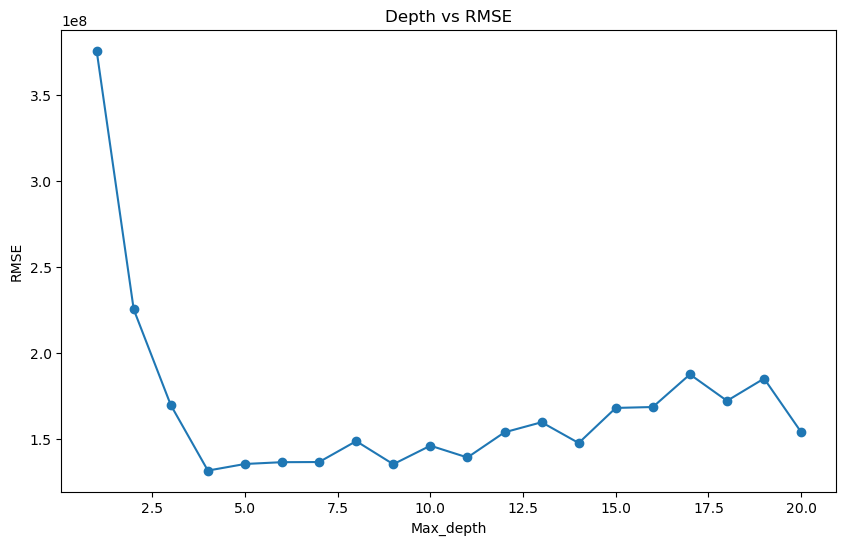

In [45]:
#use cross validation to get max depth and prune decision tree
kfold = KFold(n_splits = 10, shuffle = True)

depth = range(1,21)
mse_values = [] #create empty list to add values for plot
for max_depth in depth:
    cv_model = DecisionTreeRegressor(random_state = 100, max_depth = max_depth)
    scores = cross_val_score(cv_model, X_train_wages, wages_train, cv = kfold, scoring='neg_mean_squared_error')
    #print('max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean()))
    #print just average scores to make it easier to look at
    mse_values.append(-scores.mean())
    #print('max_depth={}' 'avg_score{}'.format(max_depth, scores.mean()))

#plot Max-Depth vs Avg Score
plt.figure(figsize = (10, 6))
plt.plot(depth, mse_values, marker = 'o')
plt.title('Depth vs RMSE')
plt.xlabel('Max_depth')
plt.ylabel('RMSE')
plt.show()

In [46]:
dtr_model_wages = DecisionTreeRegressor(random_state = 100, max_depth = 5)
dtr_model_wages.fit(X_train_wages, wages_train)
#predict on testing set
wage_pred = dtr_model_wages.predict(X_test_wages)
#calculate and print out mean squared error
rmse_dtr_wage = math.sqrt(mean_squared_error(wages_test, wage_pred))
print(rmse_dtr_wage)


11891.705001682669


In [47]:
#Linear Regression Model

In [48]:
#import necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

In [49]:
#use same train and test splits from above models to fit into Linear Regression
#standardize features to 0-1 scale to try improve/simplify it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_value)
X_test_scaled = scaler.transform(X_test_value)

#Fit Model and use on test data
linear_model_value = LinearRegression()
linear_model_value.fit(X_train_scaled, value_train)
value_pred_linear = linear_model_value.predict(X_test_scaled)
rmse_value = math.sqrt(mean_squared_error(value_test, value_pred_linear))
print(rmse_value)

coefficients = linear_model_value.coef_
features = X_train_value.columns

#create dataframe with coefficients and categories
importance_df = pd.DataFrame({
    'Category': features,
    'Coefficient': coefficients,
    'Abs Coefficient': np.abs(coefficients)
})

#sort dataframe to pull most important variables
importance_df = importance_df.sort_values(by = 'Abs Coefficient', ascending = False)
importance_df[:10]





3679463.535982335


,Category,Coefficient,Abs Coefficient
42,Club_Continent_South America,-1.351581e+18,1.351581e+18
38,Club_Continent_APAC,1.026160e+18,1.026160e+18
34,Continent_Europe,8.986302e+17,8.986302e+17
63,Club_League_ Argentine Primera División,8.329381e+17,8.329381e+17
37,Continent_South America,7.525026e+17,7.525026e+17
68,Club_League_ Categoría Primera A,6.738488e+17,6.738488e+17
81,Club_League_ J1 League,-6.543018e+17,6.543018e+17
106,Club_League_ Saudi Pro League,-6.436988e+17,6.436988e+17
44,Preferred Positions_CB,6.395428e+17,6.395428e+17
56,Preferred Positions_ST,5.885351e+17,5.885351e+17


In [50]:
#repeat same process for wages
scaler = StandardScaler()
X_train_scaled_wages = scaler.fit_transform(X_train_wages)
X_test_scaled_wages = scaler.transform(X_test_wages)

#Fit Model and use on test data
linear_model_wages = LinearRegression()
linear_model_wages.fit(X_train_scaled_wages, wages_train)
wages_pred_linear = linear_model_value.predict(X_test_scaled_wages)
rmse_value_wages = math.sqrt(mean_squared_error(wages_test, wages_pred_linear))
print(rmse_value_wages)

coefficients = linear_model_wages.coef_
features = X_train_wages.columns

#create dataframe with coefficients and categories
importance_df_wages = pd.DataFrame({
    'Category': features,
    'Coefficient': coefficients,
    'Abs Coefficient': np.abs(coefficients)
})

#sort dataframe to pull most important variables
importance_df_wages = importance_df_wages.sort_values(by = 'Abs Coefficient', ascending = False)
importance_df[:10]


5406254.596134667


,Category,Coefficient,Abs Coefficient
42,Club_Continent_South America,-1.351581e+18,1.351581e+18
38,Club_Continent_APAC,1.026160e+18,1.026160e+18
34,Continent_Europe,8.986302e+17,8.986302e+17
63,Club_League_ Argentine Primera División,8.329381e+17,8.329381e+17
37,Continent_South America,7.525026e+17,7.525026e+17
68,Club_League_ Categoría Primera A,6.738488e+17,6.738488e+17
81,Club_League_ J1 League,-6.543018e+17,6.543018e+17
106,Club_League_ Saudi Pro League,-6.436988e+17,6.436988e+17
44,Preferred Positions_CB,6.395428e+17,6.395428e+17
56,Preferred Positions_ST,5.885351e+17,5.885351e+17
